# Homework 1
## Eric O'Neil

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
header = ["variance", "skew", "curtsies", "entropy", "classes"]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
df = pd.read_csv(url, names=header)

Checking the head of the dataframe to get an idea of what the data looks like

In [54]:
df.head()

,variance,skew,curtsies,entropy,classes
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Checking row and column count (size) of the dataframe and other information that may be of value such as number of elements

In [55]:
df.size

6860

In [56]:
df.shape

(1372, 5)

In [57]:
df.axes

[RangeIndex(start=0, stop=1372, step=1),
 Index(['variance', 'skew', 'curtsies', 'entropy', 'classes'], dtype='object')]

Verifying there are no null values in the dataframe

In [58]:
df.isnull().sum()

variance    0
skew        0
curtsies    0
entropy     0
classes     0
dtype: int64

Using a histogram to try to visualize the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021038FA2BE0>,
      dtype=object)

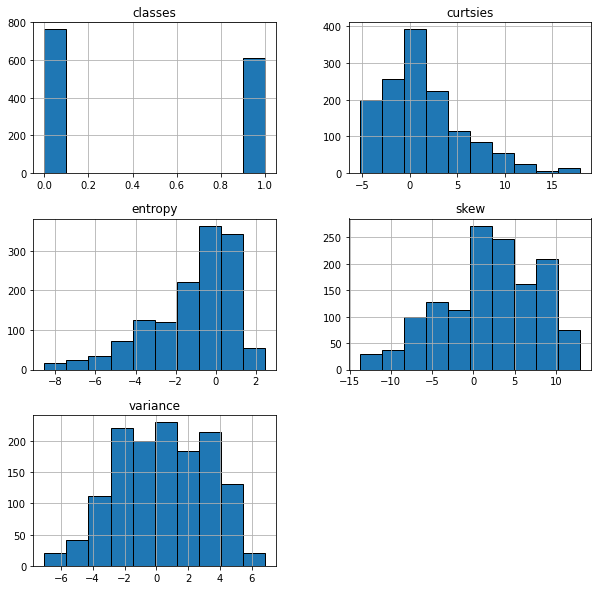

In [59]:
df.hist(figsize = (10,10), edgecolor = 'black')

Using a scatter plot to see the linear relationship between curtsies and skew

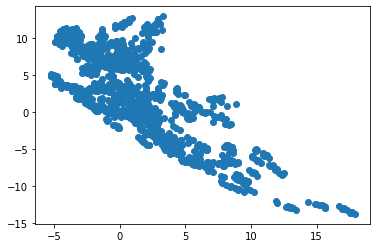

In [60]:
plt.scatter(df['curtsies'], df['skew'])

In [61]:
x = df.drop(['curtsies'], axis=1)
y = df.drop(['skew'], axis=1)

Splitting data 60/40 between training and testing

In [62]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [63]:
x_train

,variance,skew,entropy,classes
1363,-1.16670,-1.4237,0.66119,1
819,-1.53220,-5.0966,0.17498,1
409,0.64295,7.1018,-0.41337,0
711,1.72570,-4.4697,-1.80730,0
397,-0.39816,5.9781,-1.16210,0
...,...,...,...,...
1317,-1.26670,2.8183,-1.88620,1
864,0.59823,3.5012,-1.78410,1
556,1.56730,7.9274,-2.16940,0
1339,1.55140,3.8013,-3.74830,1


In [64]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()

Training the model

In [65]:
classifier.fit(x_train, y_train)

LinearRegression()

Creating prediction using test data

In [66]:
y_pred = classifier.predict(x_test)

In [67]:
y_test

,variance,curtsies,entropy,classes
599,3.929200,2.21290,0.30817,0
526,2.209100,-1.32840,-3.30210,0
704,3.702200,-1.85110,-0.12889,0
252,0.573400,-0.90940,-1.87200,0
74,4.406900,-4.57750,-4.42710,0
...,...,...,...,...
667,-0.048008,7.72150,0.45300,0
342,4.032900,0.89082,1.18230,0
847,-2.482400,6.83900,-0.59053,1
1323,-0.025314,-0.11339,1.21980,1


Calculating the accuracy of the model

In [68]:
classifier.score(x_test, y_test)

0.9717155787099011